# Obligatorio - Taller de Deep Learning

**Fecha de entrega:** 3/12/2025  
**Puntaje máximo:** 50 puntos

**Alumnos:** Lorenzo Foderé, Carlos Dutra da Silveira y Bruno Dinello

## Obligatorio

El objetivo de este obligatorio es evaluar su conocimiento en Deep Learning mediante la implementación completa de un modelo de segmentación de imágenes basado en el paper [**"U-Net: Convolutional Networks for Biomedical Image Segmentation"**](https://arxiv.org/pdf/1505.04597). Toda la implementación debe realizarse desde cero utilizando PyTorch, y los estudiantes tendrán la libertad de ajustar ciertos hiperparámetros y configuraciones mientras mantengan la esencia del paper original.

### **Competencia en Kaggle**

Además, como parte de este obligatorio, participarán en una competencia privada en Kaggle donde se les proporcionará un dataset de test oculto (sin target). Deberán subir sus predicciones a Kaggle y se evaluarán en función de la métrica **Dice Coefficient (Coeficiente de Dice)**. Esta competencia les permitirá comparar sus resultados con los de sus compañeros en un entorno real de evaluación.

### **¿Qué es el Dice Coefficient?**
El **Dice Coefficient**, también conocido como F1-score para segmentación, es una métrica utilizada para evaluar la similitud entre la predicción y la verdad del terreno en tareas de segmentación. Se define de la siguiente manera:

$$
\text{Dice} = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$

Donde:
- $A$ es el conjunto de píxeles predichos como pertenecientes a la clase positiva.
- $B$ es el conjunto de píxeles verdaderos pertenecientes a la clase positiva.
- $|A \cap B|$ es la intersección de $A$ y $B$, es decir, los píxeles correctamente predichos como positivos.

Un valor de Dice de **1** indica una predicción perfecta, mientras que un valor de **0** indica que no hay coincidencia entre la predicción y el valor verdadero. Durante la competencia de Kaggle, deberán obtener un puntaje de al menos **0.75** en la métrica Dice para considerarse aprobados.

### **Criterios a Evaluar**

1. **Análisis del Dataset (5 puntos):**
   - Exploración y visualización del dataset para comprender su estructura y características.
   - Justificación de las decisiones tomadas en la preprocesamiento de datos, como normalización, aumento de datos (data augmentation), y partición del dataset en conjuntos de entrenamiento, validación y prueba.

2. **Implementación Correcta del Modelo U-Net (20 puntos):**
   - Construcción de la arquitectura U-Net siguiendo la estructura descrita en el paper, permitiendo ajustes como el número de filtros, funciones de activación y métodos de inicialización de pesos.
   - Se aceptan mejoras como el uso de técnicas adicionales como batch normalization, otras funciones de activación, etc.

3. **Entrenamiento del Modelo (10 puntos):**
   - Configuración adecuada del ciclo de entrenamiento, incluyendo la elección de la función de pérdida y del optimizador (Adam, SGD, etc.).
   - Uso de técnicas de regularización para mejorar la generalización del modelo, como el dropout, normalización de batch y data augmentation.
   - Gráficas y análisis de la evolución del entrenamiento, mostrando las curvas de pérdida y métricas relevantes tanto en el conjunto de entrenamiento como en el de validación.
   - Puede utilizarse experimentación con hiperparámetros con Weights & Biases (W&B) para optimizar el rendimiento del modelo. Este punto no es obligatorio, pero se valorará positivamente si se justifica su uso y se presentan resultados claros.

4. **Evaluación de Resultados (10 puntos):**
   - Evaluación exhaustiva del modelo utilizando métricas de segmentación como **Dice Coefficient**.
   - Análisis detallado de los resultados, incluyendo un análisis de errores para identificar y discutir casos difíciles.
   - Visualización de ejemplos representativos de segmentaciones correctas e incorrectas, comparando con las etiquetas manuales proporcionadas en el dataset.

5. **Participación y Resultados en la Competencia Kaggle (5 puntos):**
   - Participación activa en la competencia de Kaggle, con al menos una (1) subida de predicción.
   - Puntaje obtenido en la tabla de posiciones de Kaggle, evaluado en base al **Dice Coefficient** en el conjunto de test oculto. Es necesario obtener al menos un valor de **0.75** para esta métrica.

   Notas: 
   - **Cualquier decisión debe ser justificada en el notebook.**
   - El **Dice Coefficient** es la métrica utilizada para evaluar la precisión de los modelos de segmentación de imágenes en esta competencia.

### **Run-Length Encoding (RLE)**

Dado que no se suben las imágenes segmentadas directamente a Kaggle, se requiere usar **Run-Length Encoding (RLE)** para comprimir las máscaras de predicción en una cadena de texto que será evaluada. El **RLE** es una técnica de compresión donde se representan secuencias consecutivas de píxeles en formato `start length`, indicando la posición de inicio y la longitud de cada secuencia de píxeles positivos.

Para calcular el **RLE**, se sigue el siguiente proceso:

1. Se aplanan las máscaras predichas en un solo vector
2. Se identifican los píxeles con valor positivo (1) y se calculan las secuencias consecutivas.
3. Se registra la posición de inicio de cada secuencia y su longitud en formato `start length`.

Este formato comprimido se sube a Kaggle en lugar de las imágenes segmentadas.

#### **Ejemplo de RLE**

```python
import numpy as np

def rle_encode(mask):
    pixels = np.array(mask).flatten(order='F')  # Aplanar la máscara en orden Fortran
    pixels = np.concatenate([[0], pixels, [0]])  # Añadir ceros al principio y final
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1  # Encontrar transiciones
    runs[1::2] = runs[1::2] - runs[::2]  # Calcular longitudes
    return ' '.join(str(x) for x in runs)

mask = np.array([[0, 0, 1, 0, 0],
                 [0, 1, 1, 1, 0],
                 [1, 1, 1, 0, 0],
                 [0, 0, 0, 1, 1]])

print(rle_encode(mask))
```

> **Salida:** 3 1 6 2 9 3 14 1 16 1 20 1


### **Sobre el Dataset**

El dataset proporcionado para esta tarea incluirá imágenes y máscaras para la segmentación de un conjunto específico de clases. El conjunto de entrenamiento estará disponible para su uso durante todo el proceso de desarrollo y pruebas, mientras que el conjunto de validación se mantendrá oculto para la evaluación final en Kaggle.

### **Instrucciones de Entrega**

- Deberán entregar un Jupyter Notebook (.ipynb) que contenga todo el código y las explicaciones necesarias para ejecutar la implementación, el entrenamiento y la evaluación del modelo.
- El notebook debe incluir secciones bien documentadas explicando las decisiones de diseño del modelo, los experimentos realizados, y los resultados obtenidos.
- El código debe estar escrito de manera clara.
- La entrega debe realizarse a través de la plataforma de gestión de ORT (gestion.ort.edu.uy) antes de la fecha límite.

### **Materiales Adicionales**

Para facilitar su trabajo, pueden consultar los siguientes recursos:

- [U-Net: Convolutional Networks for Biomedical Image Segmentation (paper original)](https://arxiv.org/abs/1505.04597)
- [Documentación de PyTorch](https://pytorch.org/docs/stable/index.html)
- [Tutoriales y recursos adicionales en Kaggle](https://www.kaggle.com/)
- [Convolución Transpuesta](https://d2l.ai/chapter_computer-vision/transposed-conv.html)

### **Competencia Kaggle**

[Link a la competencia Kaggle](https://www.kaggle.com/competitions/tdl-obligatorio-2025)

---

## Importación de librerías y configuración inicial

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import wandb
import sys
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from torch import optim
from torch.utils.data import DataLoader, Dataset, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision.transforms import v2 as T
from torchvision.transforms.functional import resize, InterpolationMode
from torchinfo import summary

from PIL import Image
from tqdm import tqdm

from utils import (
    DiceLoss,
    train,
    plot_training
)

In [2]:
# Definimos el dispositivo que vamos a usar
DEVICE = 'cpu'
if torch.cuda.is_available():
    DEVICE = 'cuda'
elif torch.backends.mps.is_available():
    DEVICE = 'mps'
elif torch.xpu.is_available():
    DEVICE = 'xpu'

print(f'Usando {DEVICE}')

NUM_WORKERS = 0
if sys.platform == 'linux':
    NUM_WORKERS = 4

print(f'Usando {NUM_WORKERS} workers')

Usando mps
Usando 0 workers


In [3]:
# Fijamos el tamaño del batch
BATCH_SIZE = 8

In [4]:
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

## Carga de datos y exploración

In [5]:
# Comenzamos definiendo las rutas a las imágenes de train y test y a las máscaras
train_img_path = 'data/train/images'
train_mask_path = 'data/train/masks'
test_img_path = 'data/test/images'

# Obtenemos las listas de imágenes y máscaras
train_img_files = os.listdir(train_img_path)
train_mask_files = os.listdir(train_mask_path)
test_img_files = os.listdir(test_img_path)

In [6]:
# Verificamos el tamaño de cada conjunto
print(f'Cantidad de imágenes de entrenamiento: {len(train_img_files)}')
print(f'Cantidad de máscaras para entrenamiento: {len(train_mask_files)}')
print(f'Cantidad de imágenes de test: {len(test_img_files)}')

Cantidad de imágenes de entrenamiento: 2133
Cantidad de máscaras para entrenamiento: 2133
Cantidad de imágenes de test: 534


In [7]:
# Chequeamos las dimensiones, tipos de datos y escalas de valores de imágenes y máscaras
img_name = train_img_files[0]
img_path = os.path.join(train_img_path, img_name)
mask_path = os.path.join(train_mask_path, img_name)

image_array = np.array(Image.open(img_path))
mask_array = np.array(Image.open(mask_path))

print(f'Dimensiones de la imagen: {image_array.shape}')
print(f'Dimensiones de la máscara: {mask_array.shape}')
print('-' * 45)

print(f'Dtype imagen: {image_array.dtype}')
print(f'Dtype máscara: {mask_array.dtype}')
print('-' * 45)

print(f'Rango de valores de la imagen: [{image_array.min()}, {image_array.max()}]')
print(f'Rango de valores de la máscara: [{mask_array.min()}, {mask_array.max()}]')

Dimensiones de la imagen: (800, 800, 3)
Dimensiones de la máscara: (800, 800, 3)
---------------------------------------------
Dtype imagen: uint8
Dtype máscara: uint8
---------------------------------------------
Rango de valores de la imagen: [0, 255]
Rango de valores de la máscara: [0, 1]


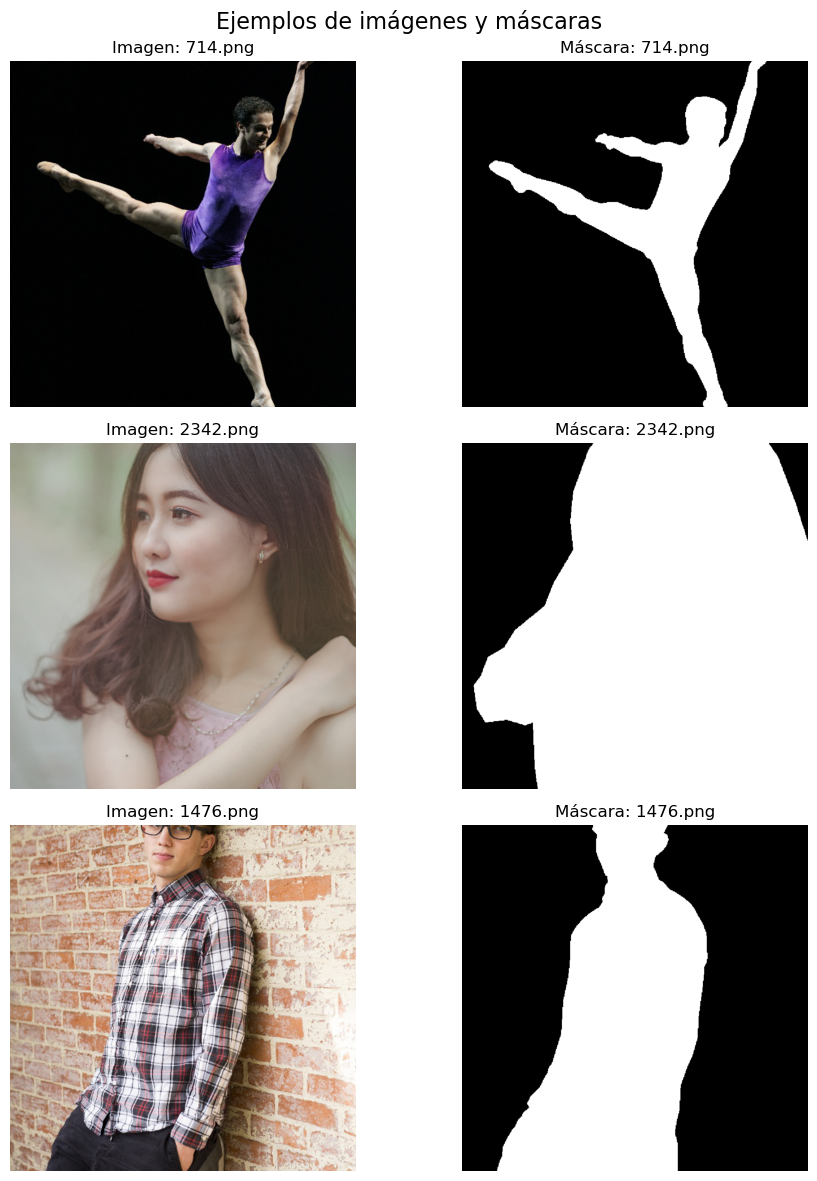

In [8]:
# A continuación, verificamos algunas imágenes junto con sus máscaras de forma aleatoria
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle('Ejemplos de imágenes y máscaras', fontsize=16)

for i in range(3):
    img_name = np.random.choice(train_img_files)
    img_path = os.path.join(train_img_path, img_name)
    mask_path = os.path.join(train_mask_path, img_name)

    image = Image.open(img_path)
    mask = Image.open(mask_path).convert('L')

    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].set_title(f'Imagen: {img_name}')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].set_title(f'Máscara: {img_name}')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

Recorriendo máscaras: 100%|██████████| 2133/2133 [00:09<00:00, 226.29it/s]


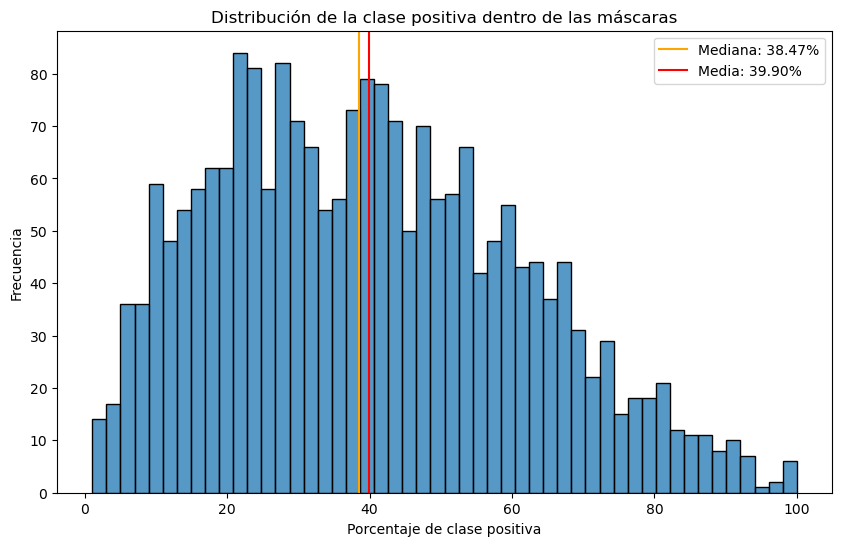

In [10]:
# Ahora chequeamos la distribución de píxeles en las máscaras, para observar el balance de clases
foreground_percentages = []

for img_name in tqdm(train_img_files, desc='Recorriendo máscaras'):
    mask_path = os.path.join(train_mask_path, img_name)
    with Image.open(mask_path) as mask_img:
        mask_array = np.array(mask_img)

        foreground_pixels = np.sum(mask_array > 0)
        total_pixels = mask_array.size
        foreground_percentages.append(float((foreground_pixels / total_pixels) * 100))

plt.figure(figsize=(10, 6))
sns.histplot(foreground_percentages, bins=50)
plt.axvline(np.median(foreground_percentages), color='orange', linestyle='-', label=f'Mediana: {np.median(foreground_percentages):.2f}%')
plt.axvline(np.mean(foreground_percentages), color='red', linestyle='-', label=f'Media: {np.mean(foreground_percentages):.2f}%')
plt.title('Distribución de la clase positiva dentro de las máscaras')
plt.xlabel('Porcentaje de clase positiva')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

**Justificación de las transformaciones a implementar**

Basándonos en el análisis exploratorio realizado, decidimos aplicar las siguientes transformaciones al dataset:

1. **Resize a IMG_SIZE:** considerando que todas las imágenes del dataset tienen la misma dimensión (800x800 píxeles), creemos necesario reducir su tamaño para el entrenamiento con el fin de poder realizarlo de forma más rápida y con menor uso de memoria. Para ello, elegiremos valores compatibles con las operaciones de pooling de la U-Net y buscaremos mantener una resolución suficiente para detectar a las personas presentes en la imagen. El riesgo que asumimos es que posiblemente perderemos el detalle fino en los bordes de las máscaras, aunque por lo visto los tamaños de las mismas son suficientemente grandes como para que esta transformación no afecte demasiado la capacidad de detección del modelo. Otra alternativa que analizamos en este sentido fue aplicar Random Crop, de forma de recortar las imágenes de forma aleatoria, pero finalmente lo descartamos ya que estaríamos cortando partes importantes de las máscaras en la gran mayoría de las imágenes.

2. **Normalización de píxeles a [0, 1]:** dado que las imágenes del dataset son de tipo RGB, cada uno de los píxeles se encuentra en el rango [0, 255]. De este modo, aplicaremos una normalización para escalar dichos valores al rango [0, 1] para estabilizar el entrenamiento y permitir que los pesos de la red se mantengan en rangos razonables. Algo a considerar al realizar esta transformación es que la misma debe aplicarse solamente a las imágenes, dado que las máscaras toman valores binarios.

3. **Random Horizontal Flip:** esta es una transformación de data augmentation que permite espejar horizontalmente a las imágenes con cierta probabilidad *p*. La elegimos con el fin de mostrarle al modelo más versiones de una misma imagen y así intentar mejorar la generalización y reducir el overfitting. De esta forma estaremos aumentando el número de muestras durante el entrenamiento sin alterarlas en cuanto a su estructura, dado que una persona seguirá siendo una persona aunque ahora reflejada. También podría permitirnos suavizar algún sesgo que haya en el dataset, que induzcan al modelo a aprender un patrón espacial equivocado.

4. **Random Rotation:** de forma análoga al caso anterior, esta transformación de data augmentation permite rotar una imagen un ángulo aleatorio dentro de un rango predefinido, manteniendo los valores de los píxeles pero modificando su orientación espacial. Esta transformación es útil porque en la vida real las personas no están perfectamente verticales, sino que pueden estar levemente inclinadas. Si el modelo solamente utilizara personas verticalmente alineadas, podría sobreajustarse a esa postura y fallar cuando recibe imágenes con personas inclinadas. A su vez, la rotación aleatoria evita que el modelo aprenda un sesgo fijo de inclinación durante el entrenamiento. De todas formas, el rango de inclinación a utilizar debe ser pequeño (aproximadamente ±15°) para que las variaciones realizadas sean naturales y se evite generar imágenes irrealistas.

5. **ColorJitter:** esta transformación permite generar perturbaciones aleatorias en atributos como el color e iluminación de las imágenes, según rangos predefinidos. Considerando que en el mundo real las fotos de personas tienen distinta exposición a la luz, cámaras que capturan colores diferentes y también variaciones de saturación, creemos que esta transformación puede evitar que el modelo solamente utilice iluminaciones homogéneas que luego lo hagan fallar cuando deba predecir utilizando imágenes con variaciones. Al igual que en la normalización, esta transformación debe ser aplicada solamente a las imágenes y no a los labels, dado que las máscaras tienen valores binarios.

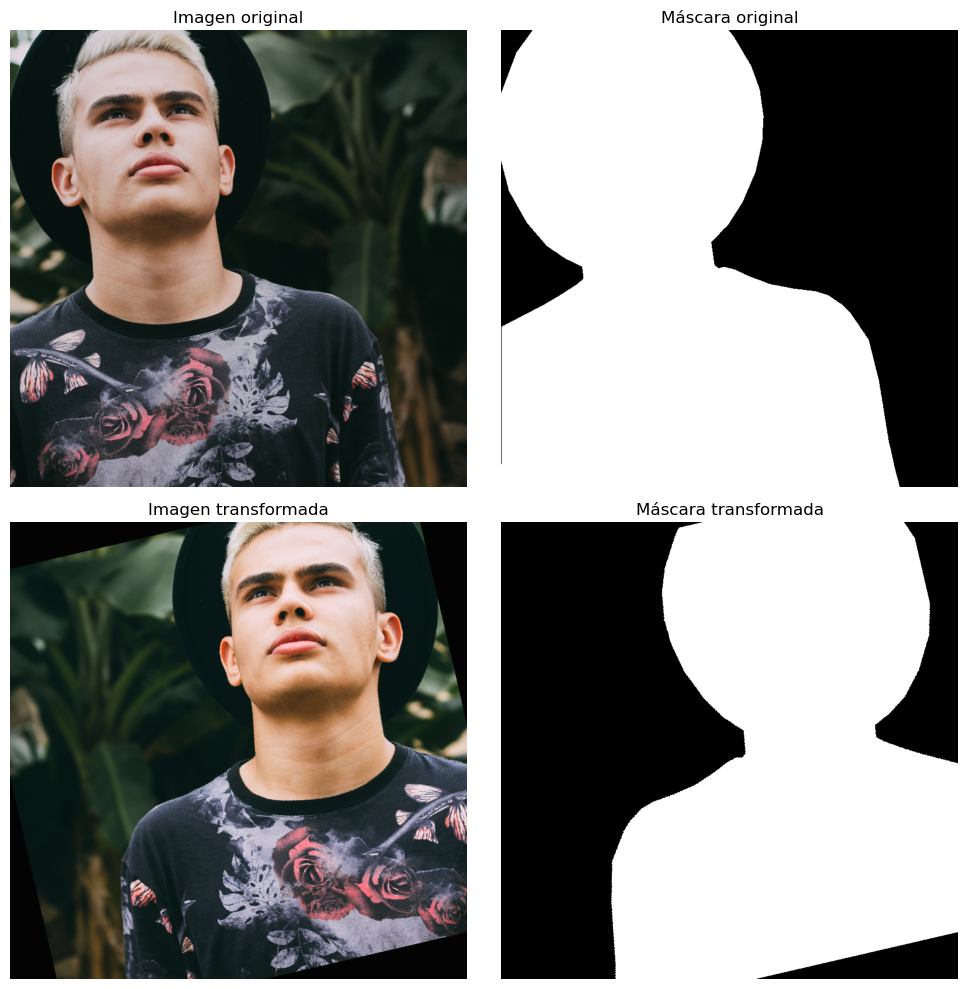

In [ ]:
# A continuación, aplicamos las transformaciones a una imagen a modo de ejemplo
img_name = np.random.choice(train_img_files)
img_path = os.path.join(train_img_path, img_name)
mask_path = os.path.join(train_mask_path, img_name)

# La máscara la llevamos a escala de grises ya que es binaria
image = Image.open(img_path)
mask = Image.open(mask_path).convert('L')

original_image = image.copy()
original_mask = mask.copy()

transformed_image = image.copy()
transformed_mask = mask.copy()

if torch.rand(1).item() < 0.5:
    transformed_image = T.functional.hflip(transformed_image)
    transformed_mask = T.functional.hflip(transformed_mask)

angle = T.RandomRotation.get_params([-15, 15])
transformed_image = T.functional.rotate(transformed_image, angle)
transformed_mask = T.functional.rotate(transformed_mask, angle)

transformed_image = T.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1)(transformed_image)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(original_image)
axes[0, 0].set_title('Imagen original')
axes[0, 1].imshow(original_mask, cmap='gray')
axes[0, 1].set_title('Máscara original')
axes[1, 0].imshow(transformed_image)
axes[1, 0].set_title('Imagen transformada')
axes[1, 1].imshow(transformed_mask, cmap='gray')
axes[1, 1].set_title('Máscara transformada')
for ax in axes.flatten():
    ax.axis('off')
plt.tight_layout()
plt.show()

## Datasets y Dataloaders

### Definición del dataset

Al crear la clase para los datasets definimos las transformaciones a aplicar, ya mencionadas anteriormente. Lo que se debe considerar aquí es que debemos distinguir varios casos:
- Imágenes para entrenamiento y validación, las cuales están etiquetadas
- Máscaras correspondientes a entrenamiento y validación
- Imágenes para test, las cuales no están etiquetadas

En este sentido, cada uno de estos casos debe recorrer su propio camino de transformaciones para luego poder generar los dataloaders correctamente.

In [ ]:
class KaggleDataset(Dataset):
    def __init__(self, img_dir, mask_dir=None, img_size=256, augment=False):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.img_size = img_size
        self.augment = augment
        self.images = sorted(os.listdir(img_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]

        image = Image.open(os.path.join(self.img_dir, img_name)).convert('RGB')

        # Si los datos son de test y no hay máscaras, devolvemos la imagen transformada y su nombre solamente
        if self.mask_dir is None:
            image = T.Resize(self.img_size)(image)
            image = T.ToImage()(image)
            image = T.ToDtype(torch.float32, scale=True)(image)
            return image, img_name

        mask = Image.open(os.path.join(self.mask_dir, img_name)).convert('L')

        # Aplicamos resize tanto a la imagen como a la máscara
        image = T.Resize(self.img_size)(image)
        mask = T.Resize(self.img_size, interpolation=T.InterpolationMode.NEAREST)(mask)

        # Realizamos las transformaciones de data augmentation
        if self.augment:
            # RandomHorizontalFlip
            if torch.rand(1).item() < 0.5:
                image = T.functional.hflip(image)
                mask = T.functional.hflip(mask)

            # RandomRotation
            angle = T.RandomRotation.get_params([-15, 15])
            image = T.functional.rotate(image, angle)
            mask = T.functional.rotate(mask, angle)

            # ColorJitter (solo a la imagen)
            image = T.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1)(image)

        # Finalmente convertimos a tensores
        image = T.ToImage()(image)
        image = T.ToDtype(torch.float32, scale=True)(image)

        mask = T.ToImage()(mask)
        mask = T.ToDtype(torch.float32, scale=False)(mask)

        return image, mask

### Dataloaders

Para obtener los dataloaders, en primer lugar dividimos los datos de train en train y validation, con una relación de 80% y 20% respectivamente.

También, definimos el parámetro *IMG_SIZE* que se utilizará para hacer el resize de las imágenes y las máscaras, ya que esa será la dimensión de entrada a la red que tendrán las imágenes.

La función *get_data_loaders*, además, devuelve el dataset correspondiente a las imágenes de validación dado que el mismo luego será utilizado para generar las visualizaciones con el modelo ya entrenado.

In [14]:
# Tamaño de las imágenes para entrenamiento
IMG_SIZE = 256

In [ ]:
def get_data_loaders(batch_size, img_size=IMG_SIZE):
    full_dataset = KaggleDataset(train_img_path, train_mask_path, img_size, augment=False)

    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size

    generator = torch.Generator().manual_seed(SEED)
    train_indices, val_indices = random_split(range(len(full_dataset)), [train_size, val_size], generator=generator)

    train_ds = KaggleDataset(train_img_path, train_mask_path, img_size, augment=True)
    train_ds.images = [full_dataset.images[i] for i in train_indices.indices]

    val_ds = KaggleDataset(train_img_path, train_mask_path, img_size, augment=False)
    val_ds.images = [full_dataset.images[i] for i in val_indices.indices]

    test_ds = KaggleDataset(test_img_path, mask_dir=None, img_size=img_size, augment=False)

    train_loader = DataLoader(
        train_ds, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS
    )

    val_loader = DataLoader(
        val_ds, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS
    )

    test_loader = DataLoader(
        test_ds, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS
    )

    print(f'Cantidad de imágenes de train: {len(train_ds)}')
    print(f'Cantidad de imágenes de val: {len(val_ds)}')
    print(f'Cantidad de imágenes de test: {len(test_ds)}')

    return train_loader, val_loader, test_loader, val_ds

In [ ]:
# Obtenemos los dataloaders y chequeamos la cantidad de datos de cada dataset
train_loader, val_loader, test_loader, val_dataset = get_data_loaders(
    batch_size=BATCH_SIZE, img_size=IMG_SIZE
)

Cantidad de imágenes de train: 1706
Cantidad de imágenes de val: 427
Cantidad de imágenes de test: 534


In [ ]:
# Verificamos las dimensiones y los rangos/valores de imágenes y máscaras
img, mask = next(iter(train_loader))
print(f'Imagen: {img.shape}, rango: [{img.min():.2f}, {img.max():.2f}]')
print(f'Máscara: {mask.shape}, valores únicos: {torch.unique(mask)}')

Imagen: torch.Size([8, 3, 256, 256]), rango: [0.00, 1.00]
Máscara: torch.Size([8, 1, 256, 256]), valores únicos: tensor([0., 1.])


## Construcción del modelo y entrenamiento

A continuación definimos la arquitectura de la red según como se detalla en el paper de referencia, realizándole algunas modificaciones con el fin de explorar otros caminos que mejoren los resultados.

Con el fin de optimizar la construcción, decidimos utilizar tres clases asociadas a los bloques que se repiten varias veces en la red:
- La doble convolución + ReLU
- La bajada por el encoder, que implica un paso de MaxPooling y luego la doble convolución anterior
- La convolución transpuesta, la cual se utiliza del lado del encoder de la red

### UNet

La clase DoubleConv representa la unidad básica de la U-Net. Su función es aplicar dos convoluciones 3×3 seguidas de Batch Normalization y ReLU. Este patrón (Conv → ReLU → Conv → ReLU) fue definido en el paper original como la forma estándar de procesar la información en cada nivel de la red.

La primera convolución ajusta la cantidad de canales, y la segunda refina las características manteniendo el mismo número de canales. El *padding = 1* asegura que la resolución de la imagen se mantenga constante, lo que simplifica la concatenación posterior entre encoder y decoder.

Como mejoras respecto al paper original, agregamos **Batch Normalization** después de cada convolución, ya que estabiliza el entrenamiento y acelera la convergencia. También incorporamos **Dropout** entre las dos convoluciones como técnica de regularización para reducir el overfitting, 'apagando' aleatoriamente canales completos durante el entrenamiento y forzando a la red a no depender excesivamente de características específicas.

In [18]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.1):
        super().__init__()
        self.conv_op = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv_op(x)

El bloque Down representa un paso en el camino de 'bajada'. Primero aplica *DoubleConv* para ejecutar las convoluciones y luego un *MaxPool2d(2)* para reducir la resolución espacial a la mitad.

El bloque devuelve dos salidas:
- ⁠*conv_out*: las características antes del pooling (que se usarán más tarde como skip connection).
- *⁠pool_out*: las características reducidas por el *MaxPooling*, que se pasan al siguiente nivel de profundidad.

Este diseño modular permite encapsular el patrón 'Conv + Pool' y facilita la construcción del encoder completo.

In [19]:
class Down(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.1):
        super().__init__()
        self.double_conv = DoubleConv(in_channels, out_channels, dropout)
        self.maxpool = nn.MaxPool2d(kernel_size=2)

    def forward(self, x):
        conv_out = self.double_conv(x)
        pool_out = self.maxpool(conv_out)
        return conv_out, pool_out

El bloque Up corresponde a un paso del camino expansivo (decoder). Su función es invertir el proceso del encoder: recuperar resolución espacial mientras combina información de contexto (de las capas profundas) con detalles locales (de las capas de skip connection del encoder).

Primero, el bloque aplica una convolución transpuesta (*ConvTranspose2d*) para duplicar el tamaño de la imagen (upsampling). Luego, se concatena el resultado con la skip connection del encoder correspondiente al mismo nivel.
Esta unión ocurre en el eje de canales: los canales provenientes del encoder y los del decoder se fusionan formando un solo tensor. En el paper original las convoluciones se realizan sin padding, por lo que era necesario cropear los bordes del skip connection del encoder para alinear tamaños. Nosotros usamos *padding = 1* en las convoluciones, por lo que basta con ajustar tamaños mediante *pad()*.

Finalmente, se aplica un DoubleConv que mezcla ambos conjuntos de características y aprende a reconstruir una representación más precisa a esa resolución.

In [20]:
class Up(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.1):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels, dropout)

    def forward(self, x1, x2):
        x1 = self.up(x1)

        # Asegurar dimensiones
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = nn.functional.pad(x1, [diffX // 2, diffX - diffX // 2,
                                    diffY // 2, diffY - diffY // 2])

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

En el siguiente bloque ensamblamos toda la arquitectura completa en forma de 'U':

- **Encoder completo (camino de contracción)**: aplica una secuencia de bloques *Down* para extraer características y reducir progresivamente la resolución. En cada nivel, las activaciones intermedias se guardan para usarse como skip connections.

- **Bottleneck**: es el punto más profundo de la red, donde la resolución es mínima y los canales son máximos.

- **Decoder completo (camino de expansión)**: aplica una secuencia de bloques *Up*, cada uno de los cuales combina las características del nivel inferior con las skip connections correspondientes del encoder. Este proceso reconstruye la imagen paso a paso.

In [21]:
class UNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=1, dropout=0.1):
        super().__init__()
        # Encoder
        self.down1 = Down(in_channels=in_channels, out_channels=64, dropout=dropout)
        self.down2 = Down(in_channels=64, out_channels=128, dropout=dropout)
        self.down3 = Down(in_channels=128, out_channels=256, dropout=dropout)
        self.down4 = Down(in_channels=256, out_channels=512, dropout=dropout)

        # Bottleneck
        self.bottleneck = DoubleConv(in_channels=512, out_channels=1024, dropout=dropout)

        # Decoder
        self.up1 = Up(in_channels=1024, out_channels=512, dropout=dropout)
        self.up2 = Up(in_channels=512, out_channels=256, dropout=dropout)
        self.up3 = Up(in_channels=256, out_channels=128, dropout=dropout)
        self.up4 = Up(in_channels=128, out_channels=64, dropout=dropout)

        # Output
        self.out = nn.Conv2d(64, num_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        x1, p1 = self.down1(x)
        x2, p2 = self.down2(p1)
        x3, p3 = self.down3(p2)
        x4, p4 = self.down4(p3)

        # Bottleneck
        b = self.bottleneck(p4)

        # Decoder
        up1 = self.up1(b, x4)
        up2 = self.up2(up1, x3)
        up3 = self.up3(up2, x2)
        up4 = self.up4(up3, x1)

        return self.out(up4)

In [ ]:
# A través del siguiente resumen observamos las dimensiones de la salida luego de cada paso junto a la cantidad de parámetros entrenables
summary(
    UNet(in_channels=3, num_classes=1, dropout=0.1),
    input_size=(BATCH_SIZE, 3, IMG_SIZE, IMG_SIZE),
    dtypes=[torch.float32],
)

Layer (type:depth-idx)                   Output Shape              Param #
UNet                                     [8, 1, 256, 256]          --
├─Down: 1-1                              [8, 64, 256, 256]         --
│    └─DoubleConv: 2-1                   [8, 64, 256, 256]         --
│    │    └─Sequential: 3-1              [8, 64, 256, 256]         38,848
│    └─MaxPool2d: 2-2                    [8, 64, 128, 128]         --
├─Down: 1-2                              [8, 128, 128, 128]        --
│    └─DoubleConv: 2-3                   [8, 128, 128, 128]        --
│    │    └─Sequential: 3-2              [8, 128, 128, 128]        221,696
│    └─MaxPool2d: 2-4                    [8, 128, 64, 64]          --
├─Down: 1-3                              [8, 256, 64, 64]          --
│    └─DoubleConv: 2-5                   [8, 256, 64, 64]          --
│    │    └─Sequential: 3-3              [8, 256, 64, 64]          885,760
│    └─MaxPool2d: 2-6                    [8, 256, 32, 32]          --
├

### Entrenamiento

Para el entrenamiento decidimos utilizar una función de pérdida diseñada particularmente que combina dos aspectos: **Binary Cross Entropy (BCE)**, que es la loss clásica utilizada en problemas de segmentación binaria, y **Dice Loss**, una función derivada directamente de la métrica Dice Coefficient utilizada en la competencia de Kaggle.

El objetivo es mantener los beneficios de lograr gradientes estables durante el entrenamiento utilizando **BCE**, y también optimizar directamente la métrica de evaluación a través de **DiceLoss**.

Al combinarlas con pesos configurables buscamos incorporar los beneficios de cada una de ellas. Luego de realizar varios entrenamientos y evaluar los resultados, observamos que una configuración de pesos de 25% para *BCE* y 75% para *Dice Loss* resulta óptima para lograr buenos resultados.

Además, decidimos realizar un entrenamiento de 200 épocas con early stopping y una paciencia de 15 épocas sin mejora.

Como optimizador elegimos *Adam*, y también incorporamos un *scheduler* (*ReduceLROnPlateau*) que reduce el *Learning Rate* cuando la métrica a seguir deja de mejorar. Con una paciencia de 3 épocas, si el *Dice Score* de validación no mejora durante 3 épocas consecutivas, el *Learning Rate* se reduce a la mitad. Esto permite ajustes más finos en etapas avanzadas del entrenamiento, mejorando la convergencia.

In [ ]:
# Creamos una función de pérdida especial que combina BCE y Dice Coefficient
class ComboLoss(nn.Module):
    def __init__(self, weight_bce=0.5, weight_dice=0.5):
        super(ComboLoss, self).__init__()
        self.bce_loss = nn.BCEWithLogitsLoss()
        self.dice_loss = DiceLoss()
        self.weight_bce = weight_bce
        self.weight_dice = weight_dice

    def forward(self, preds, targets):
        bce = self.bce_loss(preds, targets)
        dice = self.dice_loss(preds, targets)
        return self.weight_bce * bce + self.weight_dice * dice

In [ ]:
# Definimos los hiperparámetros con los que realizaremos el entrenamiento del modelo
LR=0.0005
EPOCHS=200
PATIENCE=15
CRITERION=ComboLoss(weight_bce=0.25, weight_dice=0.75).to(DEVICE)

In [ ]:
# Instanciamos el modelo, el optimizador y el scheduler
unet_model = UNet(in_channels=3, num_classes=1, dropout=0.1).to(DEVICE)
optimizer = optim.Adam(unet_model.parameters(), lr=LR)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)

Luego de entrenar el modelo con la configuración de hiperparámetros descrita anteriormente, el mismo converge pausando el entrenamiento tras 85 épocas debido al *Early Stopping*. En la siguiente sección de la notebook analizaremos con mayor detalle los resultados obtenidos.

In [26]:
# Llamada a la función de entrenamiento
train_losses, val_losses, train_dice, val_dice = train(
    model=unet_model,
    optimizer=optimizer,
    criterion=CRITERION,
    train_loader=train_loader,
    val_loader=val_loader,
    device=DEVICE,
    do_early_stopping=True,
    patience=PATIENCE,
    epochs=EPOCHS,
    scheduler=scheduler
)

Epoch: 001 | Train Loss: 0.46722 | Val Loss: 0.39844 | Train Dice: 0.64547 | Val Dice: 0.71028
Epoch: 002 | Train Loss: 0.41637 | Val Loss: 0.35424 | Train Dice: 0.68978 | Val Dice: 0.74508
Epoch: 003 | Train Loss: 0.38474 | Val Loss: 0.34401 | Train Dice: 0.71485 | Val Dice: 0.75467
Epoch: 004 | Train Loss: 0.36386 | Val Loss: 0.31793 | Train Dice: 0.73227 | Val Dice: 0.77584
Epoch: 005 | Train Loss: 0.33944 | Val Loss: 0.31614 | Train Dice: 0.75182 | Val Dice: 0.77270
Epoch: 006 | Train Loss: 0.31889 | Val Loss: 0.30395 | Train Dice: 0.76800 | Val Dice: 0.79125
Epoch: 007 | Train Loss: 0.30504 | Val Loss: 0.24495 | Train Dice: 0.77897 | Val Dice: 0.82889
Epoch: 008 | Train Loss: 0.28906 | Val Loss: 0.23427 | Train Dice: 0.79161 | Val Dice: 0.83896
Epoch: 009 | Train Loss: 0.27631 | Val Loss: 0.22615 | Train Dice: 0.80121 | Val Dice: 0.84593
Epoch: 010 | Train Loss: 0.26732 | Val Loss: 0.24876 | Train Dice: 0.80787 | Val Dice: 0.83751
Epoch: 011 | Train Loss: 0.25963 | Val Loss: 0.210

## Evaluación de resultados

Las siguientes curvas de entrenamiento muestran una convergencia del modelo tras las 85 épocas ejecutadas:

- Por un lado, tanto la *Loss* como el *Dice Score* mejoran consistentemente durante las primeras 60 épocas aproximadamente, pasando de un *Dice* de validación inicial del 71% a superar el 94%.

- También se destaca la ausencia de overfitting: las curvas de training y validation se mantienen bastante cercanas durante todo el entrenamiento. De hecho, la pérdida de validación es incluso menor que la de entrenamiento por varias épocas, lo cual podemos asociarlo con diversos aspectos, como el uso de data augmentation y de dropout.

- El uso del scheduler parece haber arrojado un efecto positivo, dado que el modelo no se quedó estancado en mesetas y continuó optimizándose, a diferencia de otros entrenamientos realizados sin el scheduler en donde las curvas comenzaban a distanciarse y estabilizarse en épocas cercanas indicando overfitting.

- A partir de la época 70 las métricas se estabilizan en torno a un dice de 94.2% en validación, indicando que el modelo alcanzó una capacidad máxima de aprendizaje con la configuración de hiperparámetros elegida. El *Early Stopping* detuvo el entrenamiento en la época 85 al no obtener mejoras tras 15 épocas consecutivas.

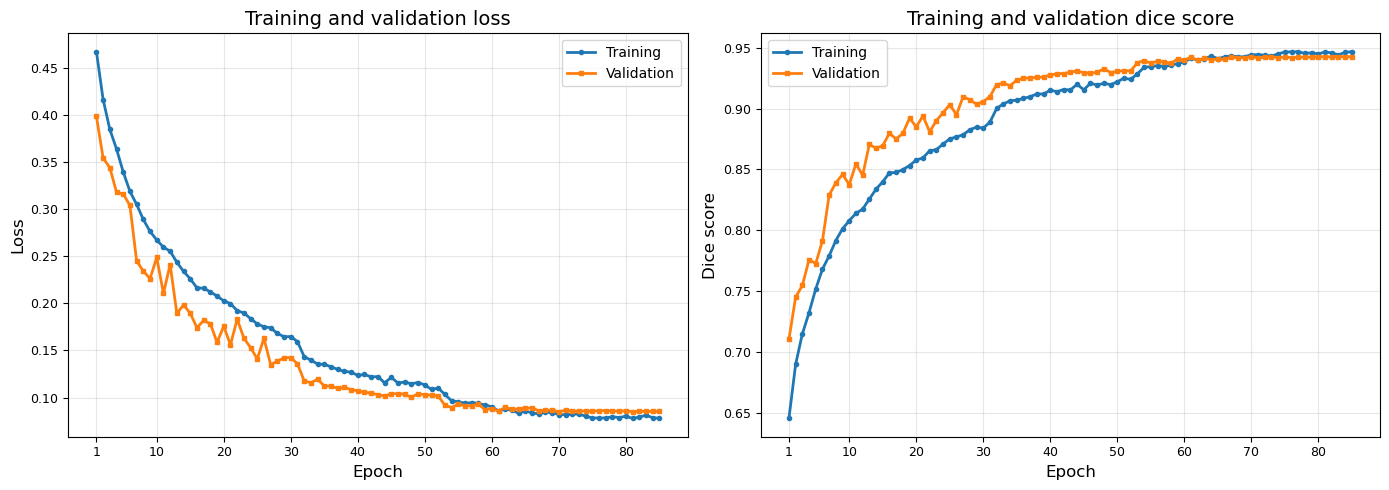

In [ ]:
# Graficamos los resultados de loss y de dice score
plot_training(train_losses, val_losses, train_dice, val_dice)

Mediante la siguiente función buscamos generar una primera visualización con 3 imágenes seleccionadas aleatoriamente, sus respectivas máscaras y las predicciones asociadas. En las mismas se observan resultados diversos, con algunas buenas predicciones y otras no tanto.

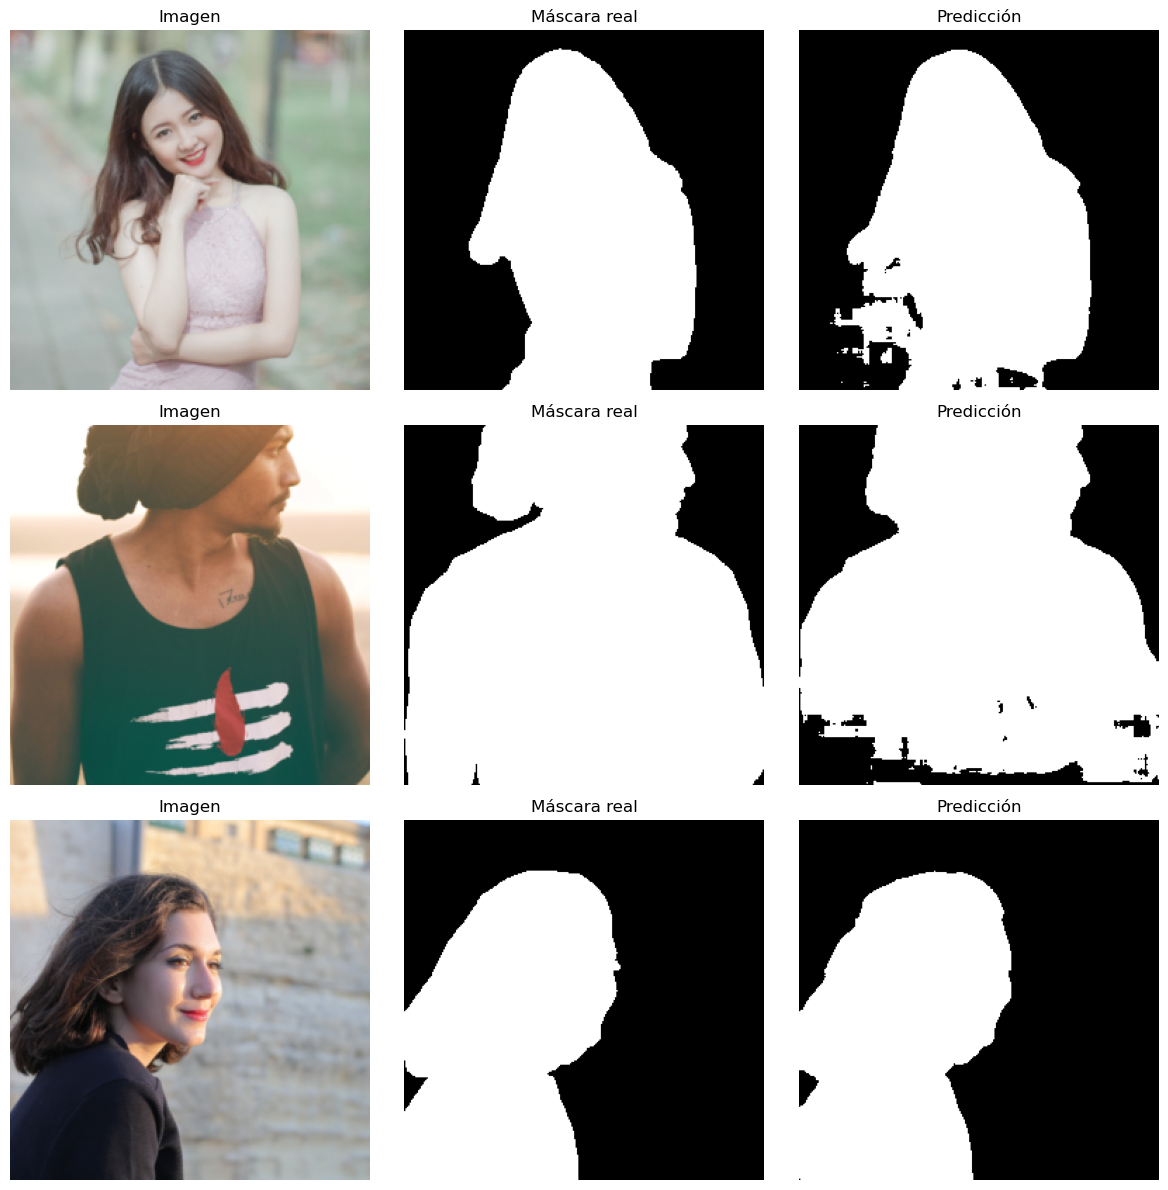

In [ ]:
# Visualizamos algunas predicciones aleatorias y las comparamos con las máscaras originales
def visualize_predictions(model, dataset, device, num_samples=3):
    model.eval()
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, 4*num_samples))

    indices = np.random.choice(len(dataset), num_samples, replace=False)

    with torch.no_grad():
        for i, idx in enumerate(indices):
            image, mask = dataset[idx]
            pred = model(image.unsqueeze(0).to(device))
            pred = (torch.sigmoid(pred) > 0.5).float().cpu().squeeze()

            axes[i, 0].imshow(image.permute(1, 2, 0))
            axes[i, 0].set_title('Imagen')
            axes[i, 1].imshow(mask.squeeze(), cmap='gray')
            axes[i, 1].set_title('Máscara real')
            axes[i, 2].imshow(pred, cmap='gray')
            axes[i, 2].set_title('Predicción')

            for ax in axes[i]:
                ax.axis('off')

    plt.tight_layout()
    plt.show()

visualize_predictions(unet_model, val_dataset, DEVICE)

Finalmente, incorporamos una nueva visualización con las tres mejores y las tres peores predicciones según el *Dice Score*. A partir de las mismas se desprende que el modelo es muy bueno cuando en la imagen hay una figura humana clara y que ocupa buena parte de la imagen. Por otro lado, los mayores desafíos (y por ende, peores resultados obtenidos) se presentan cuando la imagen contiene una persona pequeña o alejada, por lo cual al modelo le cuesta encontrarla y distinguirla de los demás objetos.

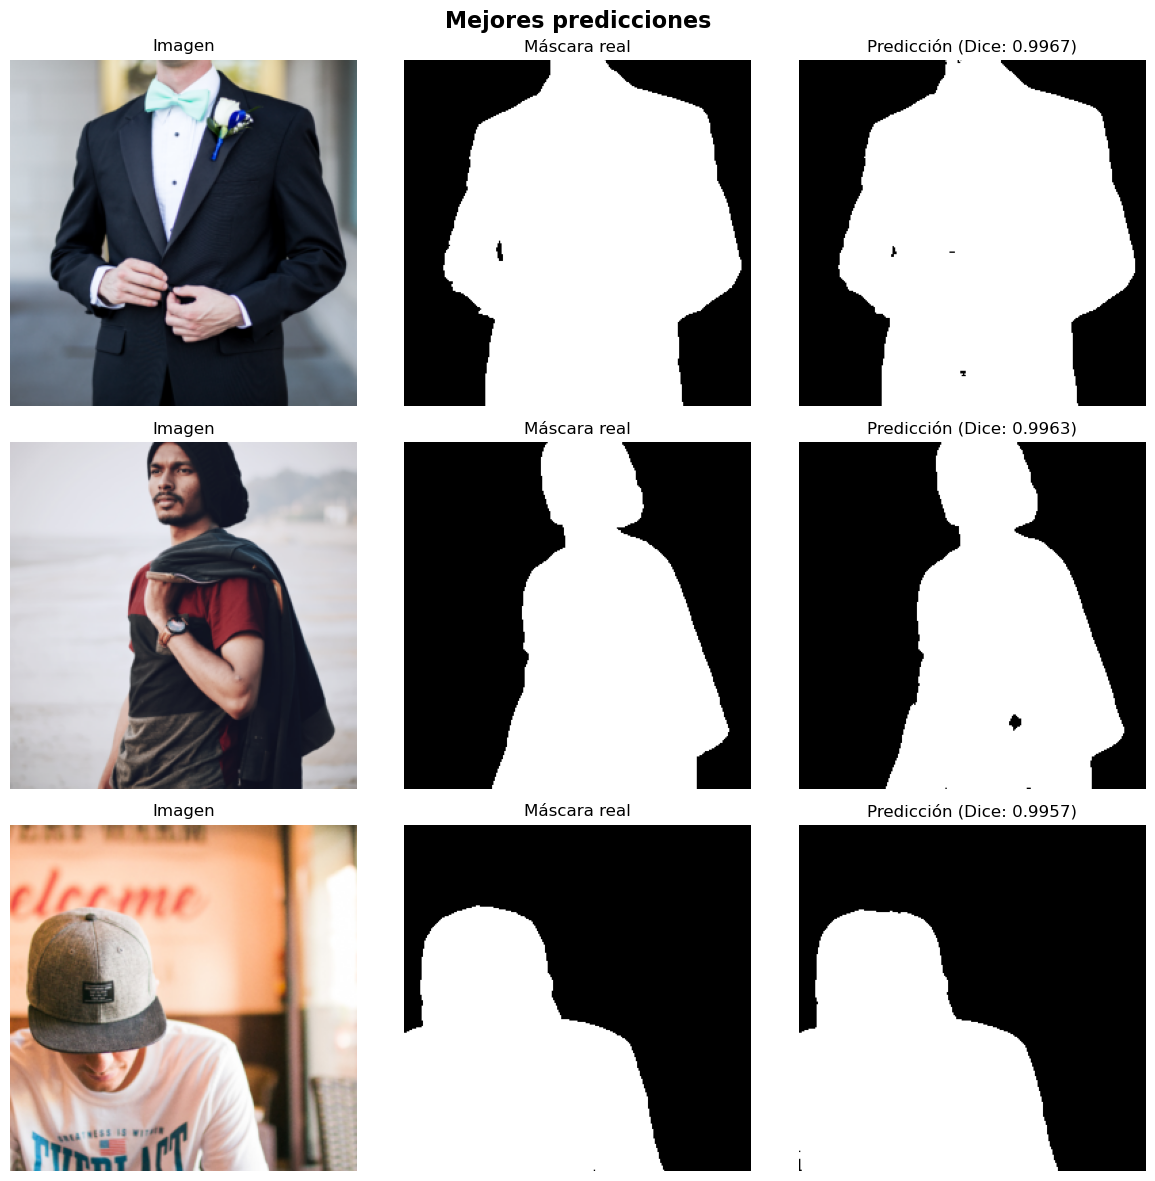

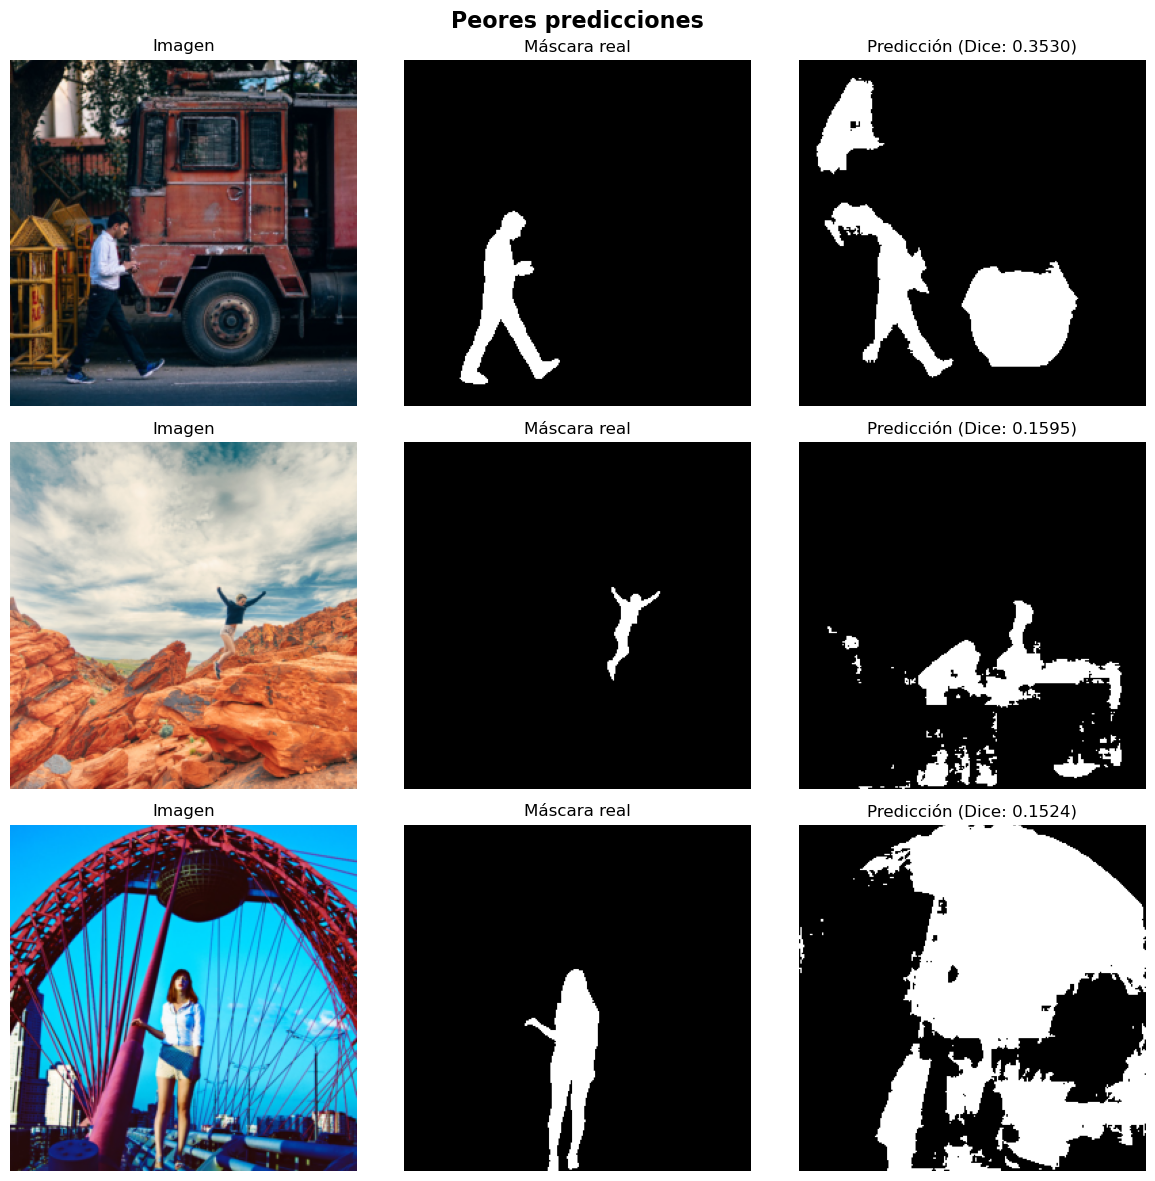

In [ ]:
def visualize_best_worst_predictions(model, dataset, device, num_samples=3):
    model.eval()

    dice_scores = []

    with torch.no_grad():
        for idx in range(len(dataset)):
            image, mask = dataset[idx]
            pred = model(image.unsqueeze(0).to(device))
            pred_binary = (torch.sigmoid(pred) > 0.5).float().cpu().squeeze()
            mask_squeezed = mask.squeeze()

            # Calculamos el Dice score
            intersection = (pred_binary * mask_squeezed).sum()
            union = pred_binary.sum() + mask_squeezed.sum()
            dice = (2.0 * intersection / (union + 1e-8)).item()

            dice_scores.append((idx, dice))

    # Ordenamos las predicciones por Dice Score
    dice_scores.sort(key=lambda x: x[1], reverse=True)

    # Obtenemos las mejores y peores predicciones
    best_indices = [x[0] for x in dice_scores[:num_samples]]
    worst_indices = [x[0] for x in dice_scores[-num_samples:]]

    # Visualizamos las mejores predicciones
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, 4*num_samples))
    fig.suptitle('Mejores predicciones', fontsize=16, fontweight='bold')

    with torch.no_grad():
        for i, idx in enumerate(best_indices):
            image, mask = dataset[idx]
            pred = model(image.unsqueeze(0).to(device))
            pred_binary = (torch.sigmoid(pred) > 0.5).float().cpu().squeeze()
            dice = dice_scores[i][1]

            axes[i, 0].imshow(image.permute(1, 2, 0))
            axes[i, 0].set_title('Imagen')
            axes[i, 1].imshow(mask.squeeze(), cmap='gray')
            axes[i, 1].set_title('Máscara real')
            axes[i, 2].imshow(pred_binary, cmap='gray')
            axes[i, 2].set_title(f'Predicción (Dice: {dice:.4f})')

            for ax in axes[i]:
                ax.axis('off')

    plt.tight_layout()
    plt.show()

    # Visualizar peores predicciones
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, 4*num_samples))
    fig.suptitle('Peores predicciones', fontsize=16, fontweight='bold')

    with torch.no_grad():
        for i, idx in enumerate(worst_indices):
            image, mask = dataset[idx]
            pred = model(image.unsqueeze(0).to(device))
            pred_binary = (torch.sigmoid(pred) > 0.5).float().cpu().squeeze()
            dice = dice_scores[-(num_samples - i)][1]

            axes[i, 0].imshow(image.permute(1, 2, 0))
            axes[i, 0].set_title('Imagen')
            axes[i, 1].imshow(mask.squeeze(), cmap='gray')
            axes[i, 1].set_title('Máscara real')
            axes[i, 2].imshow(pred_binary, cmap='gray')
            axes[i, 2].set_title(f'Predicción (Dice: {dice:.4f})')

            for ax in axes[i]:
                ax.axis('off')

    plt.tight_layout()
    plt.show()

visualize_best_worst_predictions(unet_model, val_dataset, DEVICE, num_samples=3)

Previo a realizar las submissions en Kaggle, implementamos un análisis respecto al umbral óptimo a utilizar para realizar la binarización de las probabilidades obtenidas por el modelo. Durante el entrenamiento utilizamos un umbral de 0.5, pero este valor puede que no sea el óptimo para maximizar el Dice Score.

El análisis lo implementamos sobre los datos de validación, evaluando umbrales desde 0.1 hasta 0.9. Como se observa en el gráfico, el Dice Score se mantiene relativamente estable en un rango amplio de umbrales (aproximadamente entre 0.3 y 0.7), lo que indica que el modelo produce predicciones con buena confianza. El umbral óptimo resultó ser 0.55, ligeramente superior al valor estándar de 0.5, lo cual utilizamos posteriormente para generar las predicciones de la competencia.

Evaluando umbrales: 100%|██████████| 54/54 [00:21<00:00,  2.51it/s]


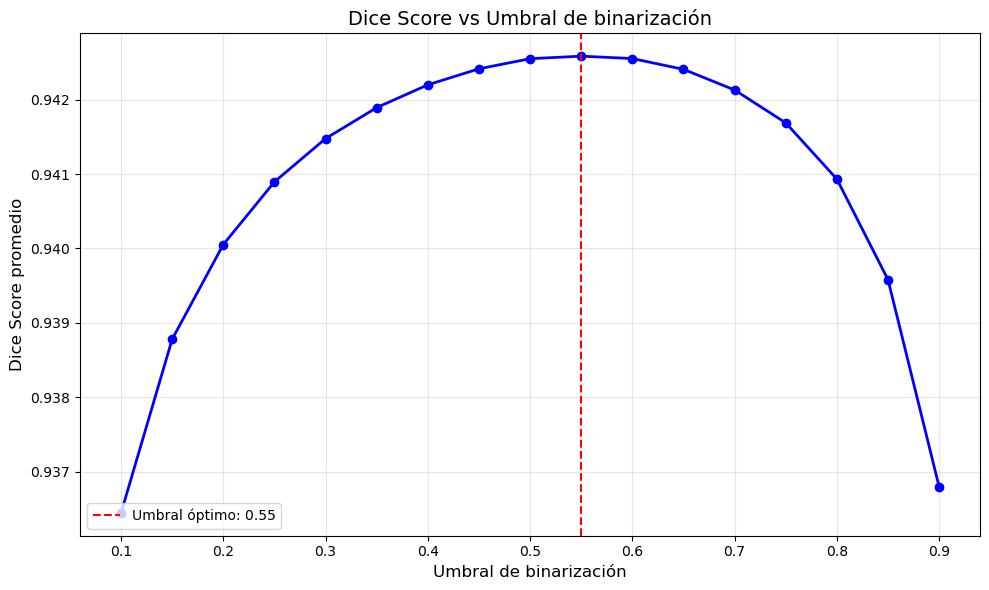

Umbral óptimo: 0.55
Dice Score promedio: 0.9426


In [ ]:
def evaluate_thresholds(model, val_loader, device, thresholds=None):

    if thresholds is None:
        thresholds = np.arange(0.1, 0.95, 0.05)

    model.eval()
    results = {t: 0.0 for t in thresholds}

    with torch.no_grad():
        for images, masks in tqdm(val_loader, desc='Evaluando umbrales'):
            images = images.to(device)
            masks = masks.to(device).float()
            preds = model(images)
            probs = torch.sigmoid(preds)

            for threshold in thresholds:
                pred_binary = (probs > threshold).float()

                # Cálculamos los scores de la misma forma que en utils
                intersection = (pred_binary * masks).sum()
                dice = (2.0 * intersection + 1e-6) / (pred_binary.sum() + masks.sum() + 1e-6)
                results[threshold] += dice.item()

    # Promediamos por número de batches
    avg_dice = {t: score / len(val_loader) for t, score in results.items()}

    # Encontramos el umbral óptimo
    optimal_threshold = max(avg_dice, key=avg_dice.get)
    optimal_dice = avg_dice[optimal_threshold]

    # Graficamos los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(list(avg_dice.keys()), list(avg_dice.values()), 'b-o', linewidth=2, markersize=6)
    plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Umbral óptimo: {optimal_threshold:.2f}')

    plt.xlabel('Umbral de binarización', fontsize=12)
    plt.ylabel('Dice Score promedio', fontsize=12)
    plt.title('Dice Score vs Umbral de binarización', fontsize=14)
    plt.legend(loc='lower left')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f'Umbral óptimo: {optimal_threshold:.2f}')
    print(f'Dice Score promedio: {optimal_dice:.4f}')

    return avg_dice, optimal_threshold

avg_dice_scores, best_threshold = evaluate_thresholds(unet_model, val_loader, DEVICE)

## Submissions para Kaggle

En esta sección utilizamos la función provista **Run-Length Encoding (RLE)** para comprimir las máscaras predichas en la cadena de texto que será evaluada.

En el proceso debemos obtener los logits del modelo, aplicar sigmoide y binarizar las predicciones (para eso utilizamos un umbral de 0.55), aplicar *resize* para devolverlas al tamaño original de 800x800 y finalmente codificarlas según la técnica de *RLE*.

In [30]:
def rle_encode(mask):
    pixels = np.array(mask).flatten(order='F')  # Aplanar la máscara en orden Fortran
    pixels = np.concatenate([[0], pixels, [0]])  # Añadir ceros al principio y final
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1  # Encontrar transiciones
    runs[1::2] = runs[1::2] - runs[::2]  # Calcular longitudes
    return ' '.join(str(x) for x in runs)

In [56]:
# Aquí implementamos el proceso para generar el archivo para las submissions de Kaggle

ORIGINAL_SIZE = 800
submission_data = []
unet_model.eval()

with torch.no_grad():
    # Iteramos sobre el dataloader de test
    for images, image_ids in tqdm(test_loader, desc='Generando predicciones'):

        images = images.to(DEVICE)
        preds = unet_model(images)
        probs = torch.sigmoid(preds)
        binary_masks = (probs > 0.55).float()

        # Iteramos sobre cada máscara en el batch
        for i in range(binary_masks.shape[0]):
            mask = binary_masks[i]
            image_id = image_ids[i]

            # Redimensionamos la máscara a 800x800
            resized_mask = resize(mask, [ORIGINAL_SIZE, ORIGINAL_SIZE], interpolation=InterpolationMode.NEAREST)

            resized_mask_np = resized_mask.cpu().numpy().squeeze()

            # Codificamos la máscara usando RLE
            encoded_pixels = rle_encode(resized_mask_np)

            # Guardamos el resultado
            submission_data.append({'id': image_id, 'encoded_pixels': encoded_pixels})

# Creamos un DataFrame de Pandas con los resultados
submission_df = pd.DataFrame(submission_data)

# Ordenamos por el número de imagen
submission_df['sort_key'] = submission_df['id'].str.extract(r'(\d+)').astype(int)
submission_df = submission_df.sort_values('sort_key').drop(columns='sort_key').reset_index(drop=True)

# Guardamos el DataFrame en un archivo .csv
submission_df.to_csv('submission.csv', index=False)

# Mostramos los primeros resultados
print(submission_df.head())

Generando predicciones: 100%|██████████| 67/67 [00:24<00:00,  2.72it/s]

       id                                     encoded_pixels
0   5.png  175848 19 175876 4 175889 6 176648 19 176676 4...
1   6.png  408 206 1208 206 2008 206 2808 206 3598 216 43...
2   8.png  113492 6 114292 6 115092 6 115895 3 115908 6 1...
3  14.png  26167 19 26967 19 27767 19 28542 63 29342 63 3...
4  19.png  91070 10 91870 10 92670 10 93458 28 94258 28 9...


## Weights and Biases (W&B)

Decidimos utilizar **Weights and Biases** con el fin de explorar las diferentes combinaciones de hiperparámetros para el entrenamiento de la red.

En ese sentido, realizamos un Sweep variando tres hiperparámetros:
- El tamaño del batch
- Learning Rate
- La probabilidad de apagado en Dropout

Ejecutamos 8 runs a partir de las diferentes combinaciones. Realizamos todos los entrenamientos con un tope de 25 épocas, activamos Early Stopping (con 5 épocas de paciencia) y utilizamos el scheduler de la misma forma que se describió anteriormente.

El fin no era realizar largos entrenamientos sino todo lo contrario: entrenamientos lo más cortos posibles, pero con una duración suficiente como para distinguir los mejores valores para los diferentes hiperparámetros.

### Sweeps

In [24]:
wandb.login()

wandb: Currently logged in as: cdutradasilveira (taller-ia-ort) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [25]:
WANDB_TEAM_NAME = 'taller-ia-ort'
WANDB_PROJECT = 'obligatorio-dl'

# Seteamos la configuración del sweep
sweep_config = {
    'name': 'sweep-obligatorio',
    'method': 'grid',
    'metric': {'name': 'val_dice', 'goal': 'maximize'},
    'parameters': {
        'batch_size': {'values': [4, 8]},
        'learning_rate': {'values': [0.001, 0.0005]},
        'dropout': {'values': [0.1, 0.3]}
    },
}

# Creamos un nuevo sweep
sweep_id = wandb.sweep(sweep_config, project=WANDB_PROJECT)

Create sweep with ID: 9v0jibfd
Sweep URL: https://wandb.ai/taller-ia-ort/obligatorio-dl/sweeps/9v0jibfd


In [ ]:
def sweep_run():
    """
    Función que se ejecutará en cada run del sweep.
    """
    wandb.init()

    config = wandb.config
    run_learning_rate = config.learning_rate
    run_batch_size = config.batch_size
    run_dropout = config.dropout

    train_loader, val_loader, _, _ = get_data_loaders(run_batch_size, img_size=128)

    criterion = ComboLoss(weight_bce=0.25, weight_dice=0.75).to(DEVICE)

    wandb_unet_model = UNet(in_channels=3, num_classes=1, dropout=run_dropout).to(DEVICE)
    optimizer = optim.Adam(wandb_unet_model.parameters(), lr=run_learning_rate)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)

    def wandb_log(epoch, train_loss, val_loss, train_dice, val_dice):
        wandb.log({
            'epoch': epoch + 1,
            'train_loss': train_loss,
            'val_loss': val_loss,
            'train_dice': train_dice,
            'val_dice': val_dice,
            'learning_rate': optimizer.param_groups[0]['lr']
        })

    train(wandb_unet_model, optimizer, criterion, train_loader, val_loader, DEVICE, True, 5, 25, wandb_log, 1, scheduler)

    torch.save(wandb_unet_model.state_dict(), 'best_model.pth')
    wandb.save('best_model.pth')
    wandb.finish()

In [27]:
wandb.agent(sweep_id, function=sweep_run)

wandb: Agent Starting Run: g2iz92az with config:
wandb: 	batch_size: 4
wandb: 	dropout: 0.1
wandb: 	learning_rate: 0.001


Cantidad de imágenes de train: 1706
Cantidad de imágenes de val: 427
Cantidad de imágenes de test: 534


wandb: Agent Starting Run: qrbyty0b with config:
wandb: 	batch_size: 4
wandb: 	dropout: 0.1
wandb: 	learning_rate: 0.0005


Cantidad de imágenes de train: 1706
Cantidad de imágenes de val: 427
Cantidad de imágenes de test: 534


wandb: Agent Starting Run: ysh4sddi with config:
wandb: 	batch_size: 4
wandb: 	dropout: 0.3
wandb: 	learning_rate: 0.001


Cantidad de imágenes de train: 1706
Cantidad de imágenes de val: 427
Cantidad de imágenes de test: 534


wandb: Agent Starting Run: 50g5x63k with config:
wandb: 	batch_size: 4
wandb: 	dropout: 0.3
wandb: 	learning_rate: 0.0005


Cantidad de imágenes de train: 1706
Cantidad de imágenes de val: 427
Cantidad de imágenes de test: 534


wandb: Agent Starting Run: qxbvyp0b with config:
wandb: 	batch_size: 8
wandb: 	dropout: 0.1
wandb: 	learning_rate: 0.001


Cantidad de imágenes de train: 1706
Cantidad de imágenes de val: 427
Cantidad de imágenes de test: 534


wandb: Agent Starting Run: qjcv9ddh with config:
wandb: 	batch_size: 8
wandb: 	dropout: 0.1
wandb: 	learning_rate: 0.0005


Cantidad de imágenes de train: 1706
Cantidad de imágenes de val: 427
Cantidad de imágenes de test: 534


wandb: Agent Starting Run: 88g9z6gp with config:
wandb: 	batch_size: 8
wandb: 	dropout: 0.3
wandb: 	learning_rate: 0.001


Cantidad de imágenes de train: 1706
Cantidad de imágenes de val: 427
Cantidad de imágenes de test: 534


wandb: Agent Starting Run: bl8bv0tr with config:
wandb: 	batch_size: 8
wandb: 	dropout: 0.3
wandb: 	learning_rate: 0.0005


Cantidad de imágenes de train: 1706
Cantidad de imágenes de val: 427
Cantidad de imágenes de test: 534


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


### Resultados

#### Batch Size

Para el tamaño del batch analizamos dos valores: 4 y 8 imágenes. Como se observa en las figuras, los resultados obtenidos en promedio son prácticamente idénticos durante cada una de las épocas. De todos modos, observamos que el tiempo de ejecución era algunos minutos más rápido al utilizar un batch de 8 imágenes que al usar 4 imágenes.

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="./images/batch_size/BS_TL.png" width="500"/>
  <img src="./images/batch_size/BS_VL.png" width="500"/>
</div>

<br>

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="./images/batch_size/BS_TDS.png" width="500"/>
  <img src="./images/batch_size/BS_VDS.png" width="500"/>
</div>

#### Learning Rate

En cuanto al learning rate pusimos en consideración los valores 0.001 y 0.0005. Cabe destacar que estos son los valores iniciales para el entrenamiento, dado que con el avance podrían verse disminuidos por el uso del scheduler. De todos modos, durante estos 8 entrenamientos los respectivos learning rates utilizados se mantuvieron invariantes respecto a sus valores iniciales.

A diferencia de los que sucede con el batch size, en este caso se observa una pequeña ventaja en todos los gráficos en favor del learning rate de 0.0005.

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="./images/learning_rate/LR_TL.png" width="500"/>
  <img src="./images/learning_rate/LR_VL.png" width="500"/>
</div>

<br>

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="./images/learning_rate/LR_TDS.png" width="500"/>
  <img src="./images/learning_rate/LR_VDS.png" width="500"/>
</div>

#### Dropout

Para la probabilidad de apagado dentro de la utilización de Dropout también contemplamos dos valores: 0.1 y 0.3. En este caso es donde se observan las diferencias más notorias entre un caso y otro, donde al utilizar una probabilidad de 0.1 se alcanzaron resultados bastante mejores que con la otra opción analizada.

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="./images/dropout/D_TL.png" width="500"/>
  <img src="./images/dropout/D_VL.png" width="500"/>
</div>

<br>

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="./images/dropout/D_TDS.png" width="500"/>
  <img src="./images/dropout/D_VDS.png" width="500"/>
</div>

## Conclusiones

En este trabajo implementamos una arquitectura U-Net desde cero para segmentación de personas en imágenes, logrando un Dice Score de 0.942 en validación y superando el umbral requerido de 0.75 en la competencia de Kaggle (el mejor resultado obtenido en el leaderboard público de la competencia fue de 0.915).

En cuanto a los hallazgos, observamos que la incorporación de Batch Normalization y Dropout como mejoras respecto al paper original contribuyó a estabilizar el entrenamiento y reducir el overfitting. También la utilización del scheduler durante el entrenamiento tuvo un efecto en el mismo sentido.

Sobre el entrenamiento, creemos que la función de pérdida combinada (ComboLoss) con 25% BCE y 75% Dice Loss resultó efectiva al optimizar directamente la métrica de evaluación mientras mantenía gradientes estables. La utilización del scheduler también aportó su parte en la convergencia del modelo y en la reducción del overfitting.

También las técnicas de data augmentation implementadas (flip, rotación, ColorJitter) fueron clave para la generalización del modelo, dado que en otros entrenamientos realizados sin la implementación de estas técnicas obtuvimos resultados bastante inferiores.

A su vez, la utilización de Weights and Biases nos permitió explorar y conocer la mejor combinación de hiperparámetros para el entrenamiento de la red.

El análisis de resultados reveló que el modelo tiene dificultades principalmente con personas pequeñas o alejadas en la imagen. En este sentido puede haber pesado el haber realizado un resize a 256x256, lo cual puede haber dificultado la detección de objetos pequeños (en este caso personas).

En ese sentido, las posibles mejoras que observamos son:
- Realizar un resizing a un tamaño más amplio (por ejemplo a 512x512), aunque esto ya implica otros tiempos de entrenamiento y también un mayor consumo de memoria
- Explorar otros tipos de data augmentation o con diferentes parámetros a los que utilizamos nosotros.